In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('/Users/patash/PSTB/Week_3/day_5/application_data.csv')
df2 = pd.read_csv('/Users/patash/PSTB/Week_3/day_5/previous_application.csv')
print(df1.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [69]:
print(df2.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Nettoyage

In [72]:
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

<Axes: >

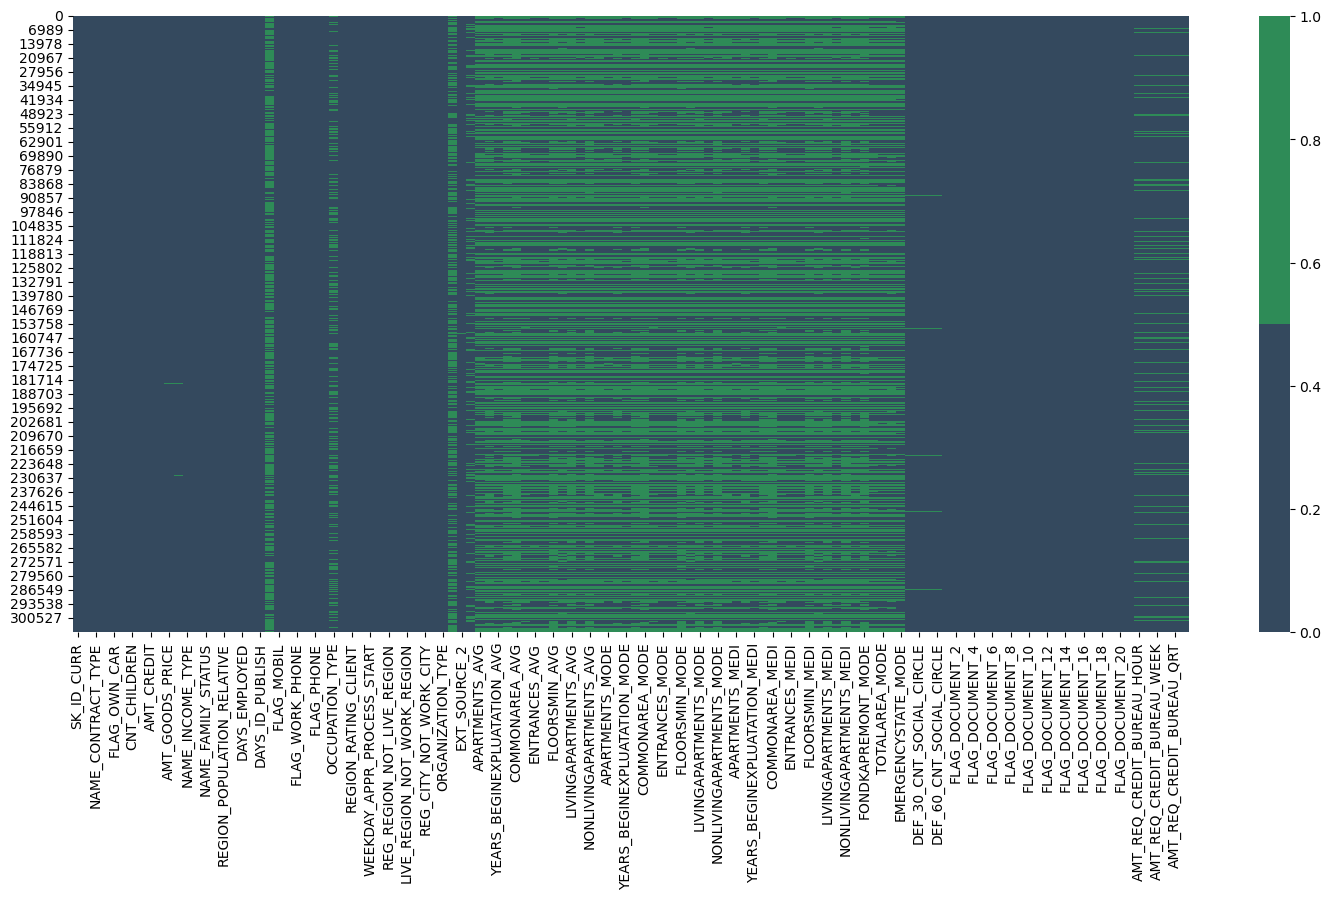

In [73]:
plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen']
sns.heatmap(df1.isnull(), cmap=sns.color_palette(colours))

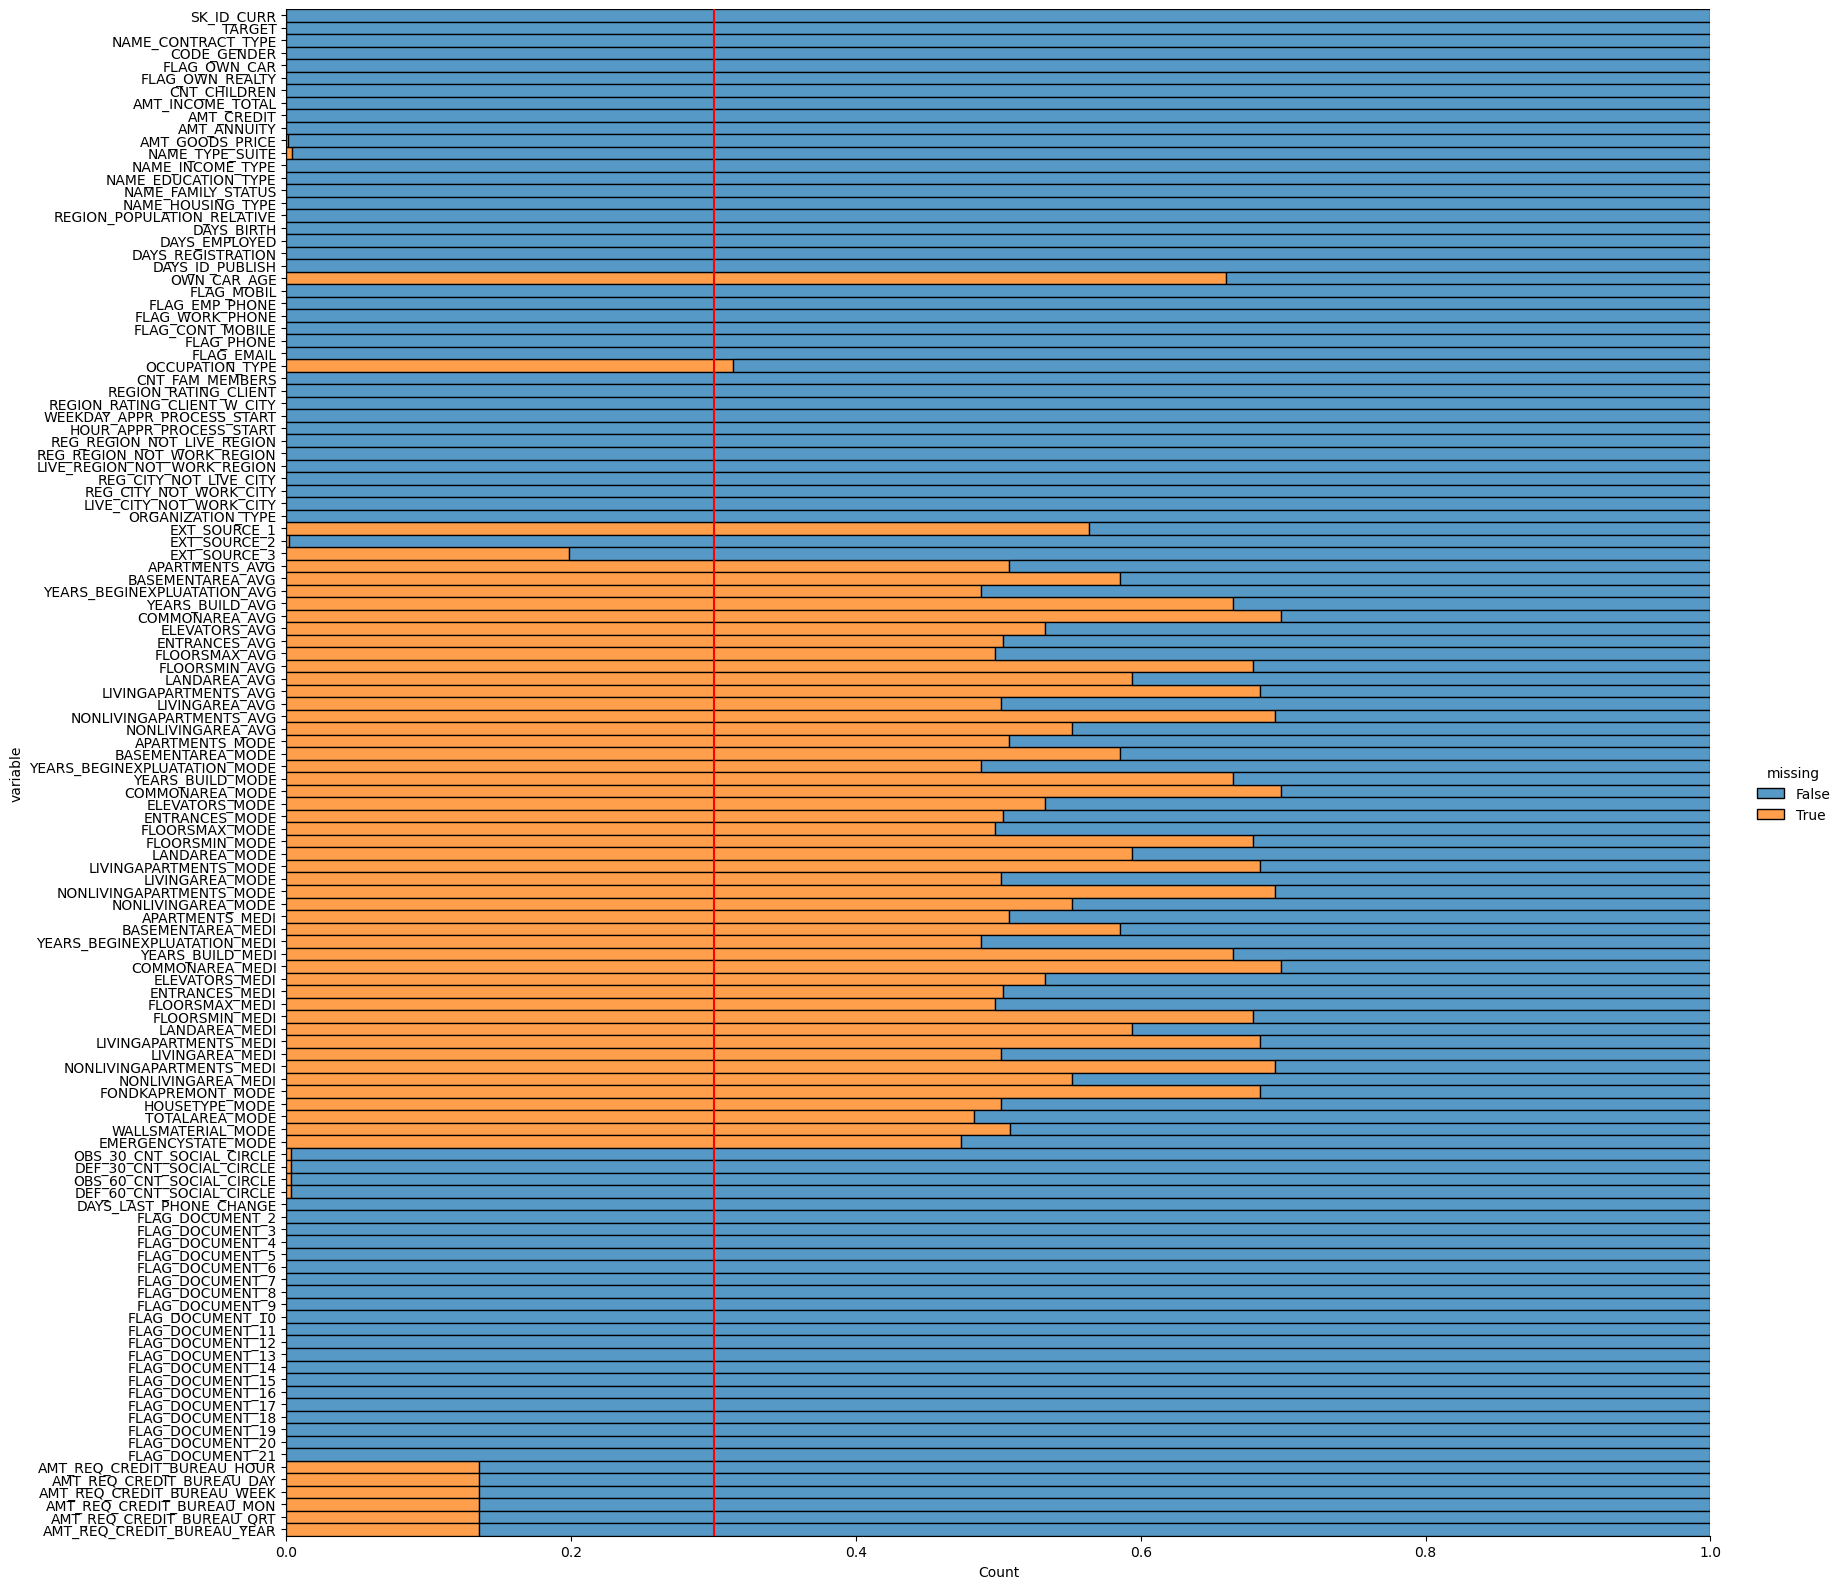

In [74]:
sns.displot(
    data=df1.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=16,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.3, color='r')

In [75]:
# Suppression des colonnes avec plus de 30% missing
percent_missing = df1.isnull().sum() * 100 / len(df1)
cols_wih_missing_30 = percent_missing[percent_missing > 30].index.tolist()

print(len(cols_wih_missing_30))
print(cols_wih_missing_30)
     

50
['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE'

In [76]:
import scipy.stats as stat

modalities = df1['TARGET'].unique()
results = []

# Sélectionner uniquement les colonnes numériques
num_cols_liste = df1.select_dtypes(include=['number']).columns.tolist()
num_cols_liste.remove('TARGET')  # Exclure la colonne cible
num_cols_liste.remove('SK_ID_CURR')  # Exclure la colonne ID
results = []

for feature in num_cols_liste:
    st, p_value = stat.f_oneway(*[list(df1.loc[df1['TARGET'] == m, feature]) for m in modalities])
    if p_value < 0.05:
        results.append([feature, p_value, 'rejetée', 'Oui'])
    else:
        results.append([feature, p_value, 'acceptée', 'Non'])

anova_results = pd.DataFrame(results, columns=['Feature', 'p_value', 'H0 : Indépendance', 'H1 : Dépendance'])
anova_results.sort_values(by=['p_value'])

,Feature,p_value,H0 : Indépendance,H1 : Dépendance
6,DAYS_BIRTH,0.000000e+00,rejetée,Oui
19,REGION_RATING_CLIENT_W_CITY,2.078455e-250,rejetée,Oui
18,REGION_RATING_CLIENT,2.172433e-234,rejetée,Oui
9,DAYS_ID_PUBLISH,2.527524e-179,rejetée,Oui
25,REG_CITY_NOT_WORK_CITY,3.805463e-176,rejetée,Oui
...,...,...,...,...
99,AMT_REQ_CREDIT_BUREAU_DAY,NaN,acceptée,Non
100,AMT_REQ_CREDIT_BUREAU_WEEK,NaN,acceptée,Non
101,AMT_REQ_CREDIT_BUREAU_MON,NaN,acceptée,Non
102,AMT_REQ_CREDIT_BUREAU_QRT,NaN,acceptée,Non


In [77]:

num_cols_target_depend = anova_results[anova_results['H1 : Dépendance'] == 'Oui'].shape[0]
num_cols_target_independ = anova_results[anova_results['H1 : Dépendance'] == 'Non'].shape[0]

print(f" Nombre de colonnes dépendantes de TARGET : {num_cols_target_depend}")
print(f" Nombre de colonnes non dépendantes de TARGET : {num_cols_target_independ}")

 Nombre de colonnes dépendantes de TARGET : 31
 Nombre de colonnes non dépendantes de TARGET : 73


In [78]:
#columns wich are indpedante from Target:
cols_anova_to_drop = anova_results[anova_results['H1 : Dépendance'] == 'Non']['Feature'].tolist()
cols_to_drop = cols_wih_missing_30 + cols_anova_to_drop

# 2. Drop these columns
df1_reduced = df1.drop(columns=cols_to_drop)

# 3. Verifie new df1
print(f"Nombre de colonnes restantes dans df1 : {df1_reduced.shape[1]}")
print(f"Colonnes supprimées : {cols_to_drop}")

Nombre de colonnes restantes dans df1 : 44
Colonnes supprimées : ['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_M

In [79]:
df1_reduced.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18',
     

In [80]:
df1_reduced.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_PHONE                        0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION  

In [81]:
	
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

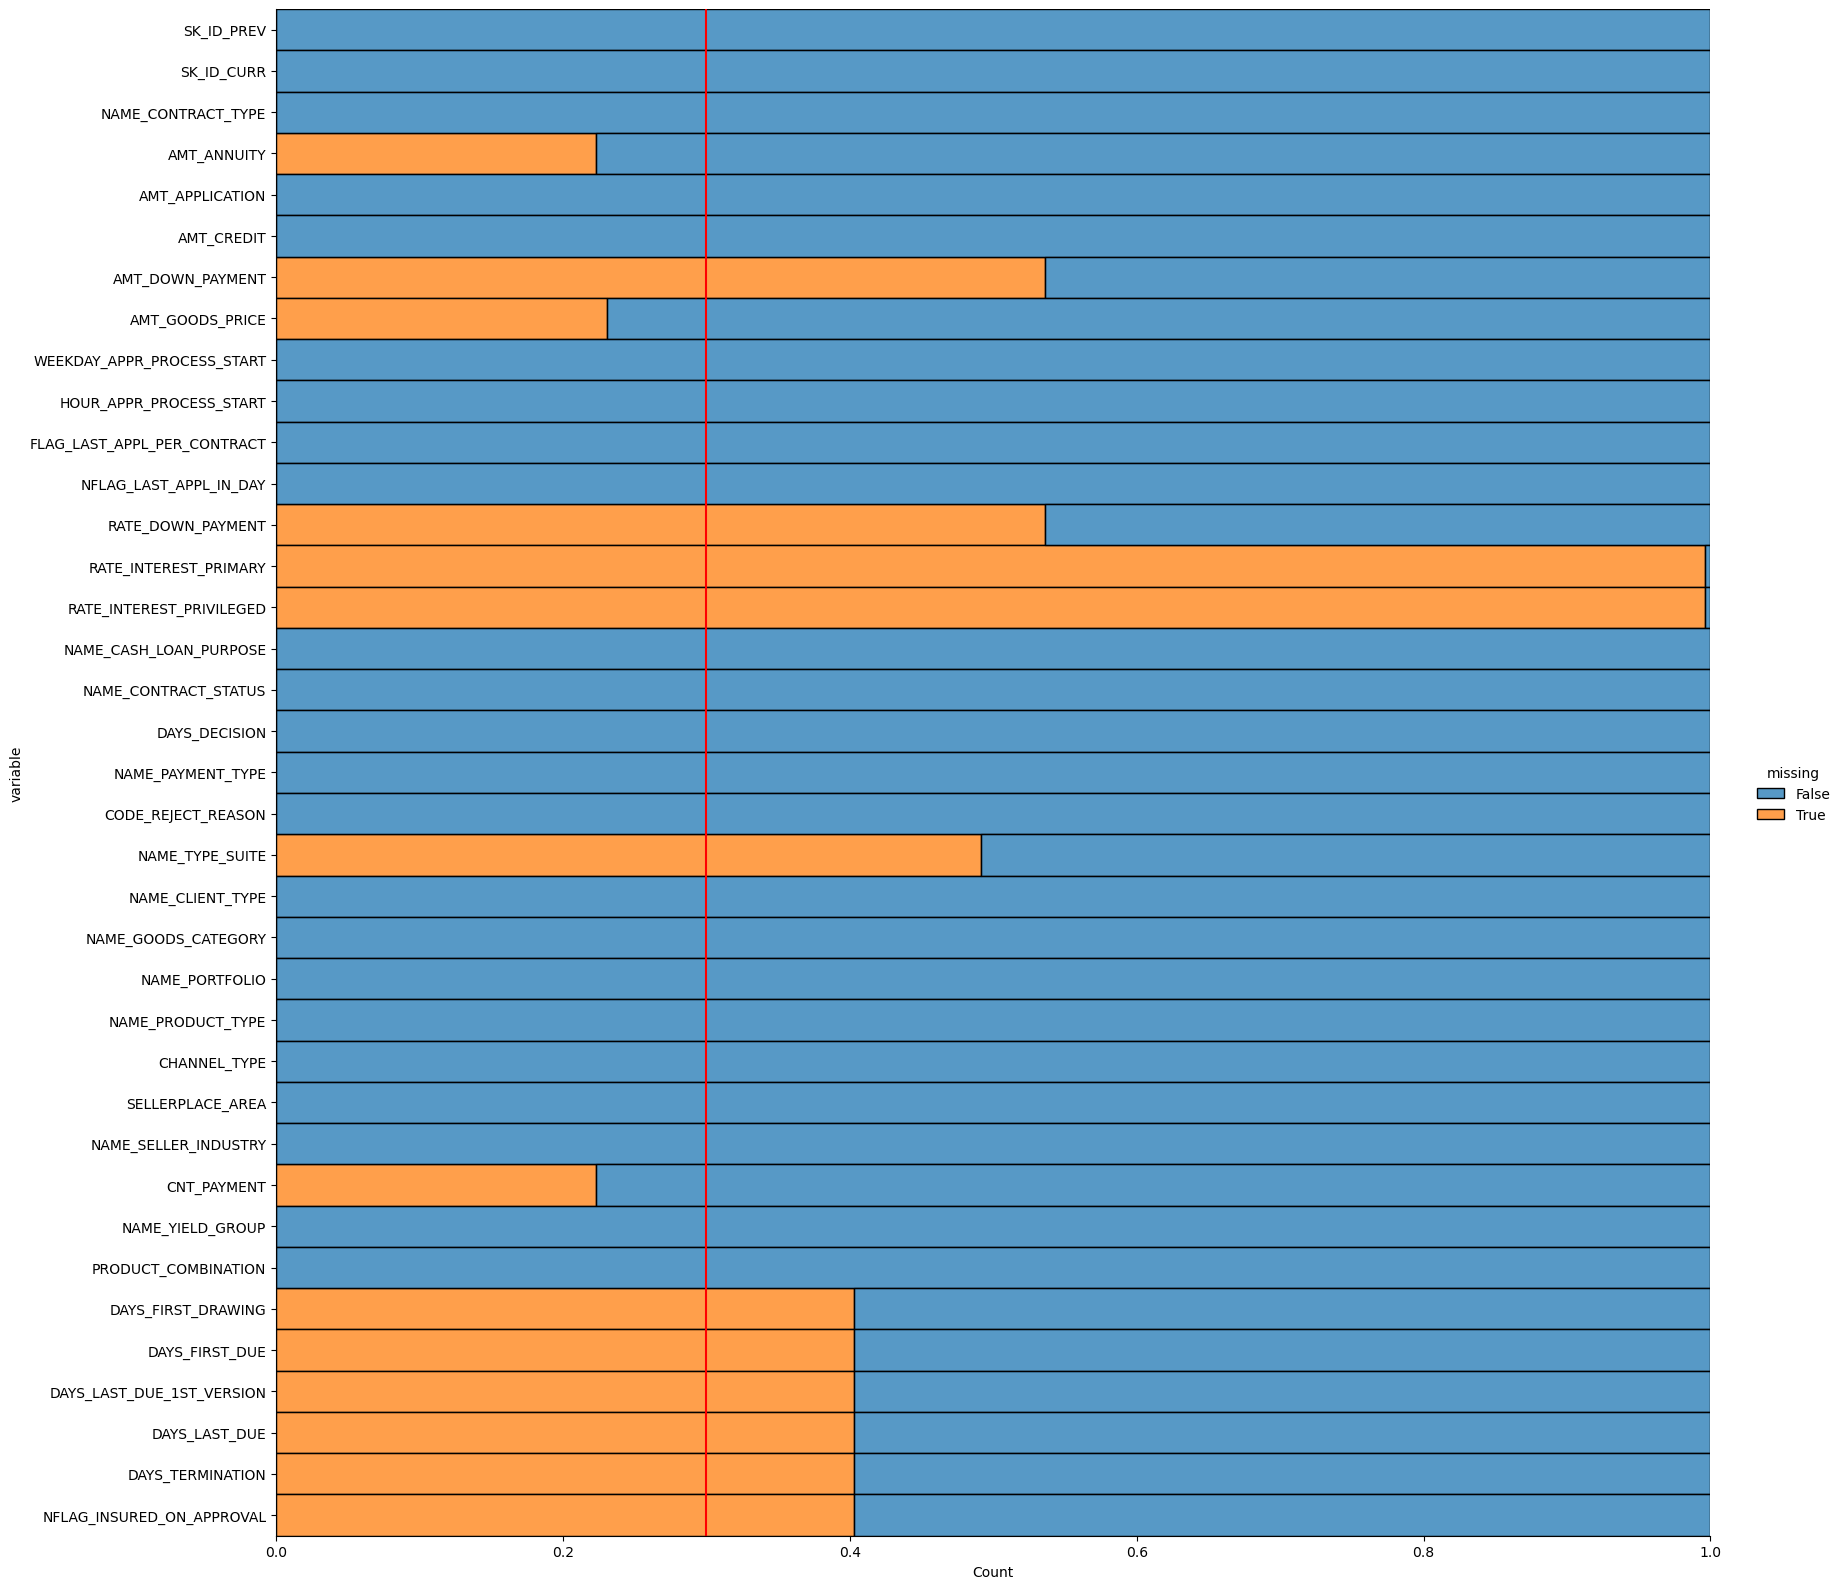

In [82]:
sns.displot(
    data=df2.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=16,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.3, color='r')

In [83]:

percent_missing_2 = df2.isnull().sum() * 100 / len(df2)
cols_wih_missing_2 = percent_missing_2[percent_missing_2 > 50].index.tolist()

print(len(cols_wih_missing_2))
print(cols_wih_missing_2)

4
['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


In [84]:
df2_reduced = df2.drop(columns=cols_wih_missing_2)
df2_reduced.shape

(1670214, 33)

In [85]:
common_cols = df1_reduced.columns.intersection(df2_reduced.columns)
print(common_cols)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'NAME_TYPE_SUITE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],
      dtype='object')


In [86]:
df_joined = pd.merge(df1_reduced, df2_reduced, on='SK_ID_CURR', how='inner')
df_joined.shape
    

(1413701, 76)

In [87]:

df_joined.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
DAYS_FIRST_DUE               561106
DAYS_LAST_DUE_1ST_VERSION    561106
DAYS_LAST_DUE                561106
DAYS_TERMINATION             561106
NFLAG_INSURED_ON_APPROVAL    561106
Length: 76, dtype: int64

In [88]:
df_joined.dtypes

SK_ID_CURR                     int64
TARGET                         int64
NAME_CONTRACT_TYPE_x          object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
                              ...   
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
DAYS_LAST_DUE                float64
DAYS_TERMINATION             float64
NFLAG_INSURED_ON_APPROVAL    float64
Length: 76, dtype: object

In [89]:
cat_cols = df_joined.select_dtypes(include=['object']).columns.tolist()
num_cols = df_joined.select_dtypes(include=['number']).columns.tolist()
print(f" Number of categoriel columns in df_joined: {len(cat_cols)}")
print(f" Number of numerical columns in df_joined: {len(num_cols)}")

 Number of categoriel columns in df_joined: 27
 Number of numerical columns in df_joined: 49


In [90]:
df_joined.duplicated().sum()

0

In [91]:

corr_with_target = df_joined[num_cols].corr()['TARGET'].sort_values(ascending=False)
top_5_num_cols = corr_with_target[corr_with_target.index.isin(num_cols)].head(5)
top_5_num_cols

TARGET                         1.000000
DAYS_BIRTH                     0.074866
REGION_RATING_CLIENT_W_CITY    0.059700
REGION_RATING_CLIENT           0.056932
DAYS_ID_PUBLISH                0.051037
Name: TARGET, dtype: float64

In [92]:
from sklearn.feature_selection import chi2
#fisrt we need to encode categoriel columns
cat_cols_encoded = pd.get_dummies(df_joined[cat_cols])
     

In [93]:
#Apply chi2 test
chi2_scores, p_values = chi2(cat_cols_encoded, df_joined['TARGET'])

In [94]:
chi2_results = pd.DataFrame({'Feature': cat_cols_encoded.columns, 'Chi2_Score': chi2_scores, 'p_value': p_values})
chi2_results = chi2_results.sort_values(by='Chi2_Score', ascending=False)
top_5_cat_cols = chi2_results.head(5)
top_5_cat_cols

,Feature,Chi2_Score,p_value
144,NAME_CONTRACT_STATUS_Refused,3464.777016,0.0
18,NAME_INCOME_TYPE_Pensioner,2754.366776,0.0
103,ORGANIZATION_TYPE_XNA,2708.755973,0.0
24,NAME_EDUCATION_TYPE_Higher education,2688.544063,0.0
3,CODE_GENDER_M,2670.414405,0.0


In [95]:

top_5_cat_cols = ['NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER']
top_5_num_cols = ['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH']

df = df_joined[top_5_num_cols + top_5_cat_cols]
df.head()

,SK_ID_CURR,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,CODE_GENDER
0,100002,1,-9461,2,2,-2120,Approved,Working,Business Entity Type 3,Secondary / secondary special,M
1,100003,0,-16765,1,1,-291,Approved,State servant,School,Higher education,F
2,100003,0,-16765,1,1,-291,Approved,State servant,School,Higher education,F
3,100003,0,-16765,1,1,-291,Approved,State servant,School,Higher education,F
4,100004,0,-19046,2,2,-2531,Approved,Working,Government,Secondary / secondary special,M


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 11 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   SK_ID_CURR                   1413701 non-null  int64 
 1   TARGET                       1413701 non-null  int64 
 2   DAYS_BIRTH                   1413701 non-null  int64 
 3   REGION_RATING_CLIENT_W_CITY  1413701 non-null  int64 
 4   REGION_RATING_CLIENT         1413701 non-null  int64 
 5   DAYS_ID_PUBLISH              1413701 non-null  int64 
 6   NAME_CONTRACT_STATUS         1413701 non-null  object
 7   NAME_INCOME_TYPE             1413701 non-null  object
 8   ORGANIZATION_TYPE            1413701 non-null  object
 9   NAME_EDUCATION_TYPE          1413701 non-null  object
 10  CODE_GENDER                  1413701 non-null  object
dtypes: int64(6), object(5)
memory usage: 118.6+ MB


In [97]:
df["DAYS_BIRTH"].unique()

array([ -9461, -16765, -19046, ...,  -7857, -25061, -24864])

In [98]:
df = df.copy()  # Copie du DataFrame pour éviter le warning
df['AGE'] = round(abs(df['DAYS_BIRTH']) / 365, 1)
df['AGE'].unique()

array([25.9, 45.9, 52.2, 52.1, 54.6, 46.4, 37.7, 51.6, 55.1, 39.6, 27.9,
       55.9, 36.8, 38.6, 40. , 23.9, 35.4, 26.8, 48.5, 31.1, 40.6, 30.5,
       68. , 30.9, 53. , 43.7, 27.4, 28.3, 41.9, 35.5, 32. , 43.8, 33.3,
       47.1, 57.7, 65.5, 44.2, 47.9, 46.5, 36.7, 64.5, 26.9, 21.8, 55.8,
       54. , 50. , 51. , 33.6, 28.7, 59.2, 38.9, 56.3, 21.7, 62.6, 33.5,
       33. , 53.6, 42.1, 32.8, 29.7, 32.9, 42.2, 40.7, 30.6, 39.1, 48.1,
       53.3, 26.5, 62.8, 51.2, 48. , 47.6, 63.1, 43.6, 49.7, 57.8, 50.8,
       54.3, 35. , 29.4, 41.5, 40.4, 61.6, 26.4, 46. , 30. , 65. , 65.9,
       35.3, 58.5, 28.8, 37.9, 64.8, 25.2, 55.6, 39.3, 36.4, 62.7, 44.6,
       62.9, 44.8, 45.3, 44.1, 50.4, 32.7, 39. , 33.8, 40.1, 45.7, 44.4,
       60.2, 41.4, 31.9, 48.4, 39.2, 52.8, 31.2, 42.7, 37.1, 67.8, 55.4,
       59.9, 42. , 38.3, 59.8, 49. , 35.1, 31.7, 35.9, 57.1, 46.3, 63. ,
       53.5, 50.1, 34.7, 45.1, 38.4, 38. , 27.7, 59.5, 54.2, 37.3, 36.2,
       38.8, 37.2, 38.2, 49.2, 48.9, 50.2, 45.5, 43

In [99]:
print(f"The Maximal Age is {df['AGE'].max()} years old")
print(f"The Minimal Age is {df['AGE'].min()} years old")

The Maximal Age is 69.0 years old
The Minimal Age is 20.5 years old


In [100]:
df["DAYS_ID_PUBLISH"].unique()

array([-2120,  -291, -2531, ..., -5906, -5854, -6211])

In [101]:
# Convertir les jours en dates réelles sans l'heure
df['PUBLISH_DATE'] = (pd.to_datetime('today') + pd.to_timedelta(df['DAYS_ID_PUBLISH'], unit='D')).dt.date

df['PUBLISH_DATE']

0          2019-05-13
1          2024-05-15
2          2024-05-15
3          2024-05-15
4          2018-03-28
              ...    
1413696    2024-01-17
1413697    2024-01-17
1413698    2024-01-17
1413699    2024-01-17
1413700    2024-01-17
Name: PUBLISH_DATE, Length: 1413701, dtype: object

/var/folders/0x/ld7nmr854gg9f09bct0w9drh0000gn/T/ipykernel_41348/3253218699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['TARGET'], palette='Blues')


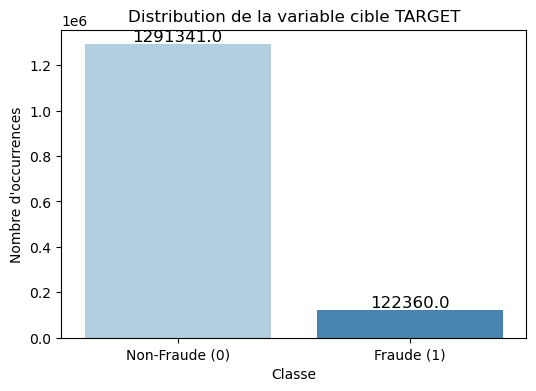

In [102]:
plt.figure(figsize=(6, 4))

# Créer un countplot pour visualiser la distribution
sns.countplot(x=df['TARGET'], palette='Blues')

# Ajouter les valeurs sur les barres
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=12, color='black')

# Personnalisation des labels et du titre
plt.xticks([0, 1], ['Non-Fraude (0)', 'Fraude (1)'])
plt.xlabel("Classe")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de la variable cible TARGET")

# Afficher le graphique
plt.show()

/var/folders/0x/ld7nmr854gg9f09bct0w9drh0000gn/T/ipykernel_41348/3174707810.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TARGET'] == 0]['AGE'], label='Non-Fraude (0)', shade=True, color='blue')
/var/folders/0x/ld7nmr854gg9f09bct0w9drh0000gn/T/ipykernel_41348/3174707810.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TARGET'] == 1]['AGE'], label='Fraude (1)', shade=True, color='red')


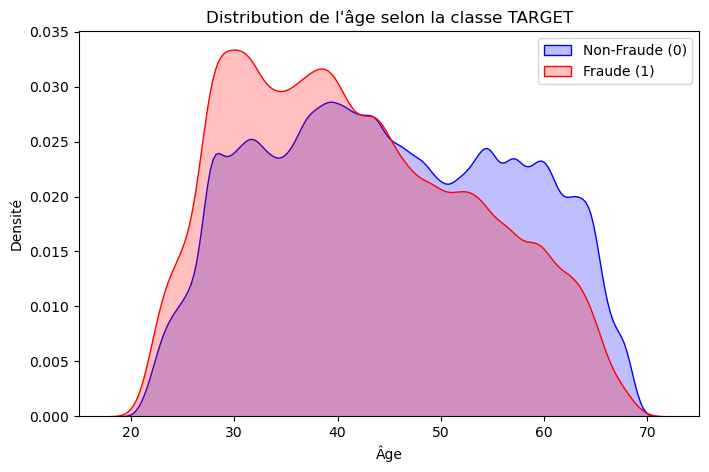

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Tracer la distribution de AGE pour chaque classe de TARGET
sns.kdeplot(df[df['TARGET'] == 0]['AGE'], label='Non-Fraude (0)', shade=True, color='blue')
sns.kdeplot(df[df['TARGET'] == 1]['AGE'], label='Fraude (1)', shade=True, color='red')

# Ajouter des labels et un titre
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.title("Distribution de l'âge selon la classe TARGET")
plt.legend()

# Afficher le graphique
plt.show()

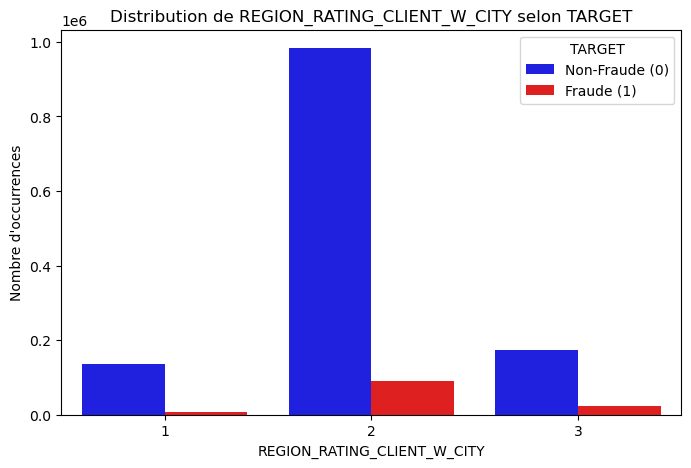

In [104]:
plt.figure(figsize=(8, 5))

# Tracer la distribution de REGION_RATING_CLIENT_W_CITY en fonction de TARGET
sns.countplot(x=df['REGION_RATING_CLIENT_W_CITY'], hue=df['TARGET'], palette=['blue', 'red'])

# Ajouter des labels et un titre
plt.xlabel("REGION_RATING_CLIENT_W_CITY")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de REGION_RATING_CLIENT_W_CITY selon TARGET")
plt.legend(title="TARGET", labels=["Non-Fraude (0)", "Fraude (1)"])

# Afficher le graphique
plt.show()

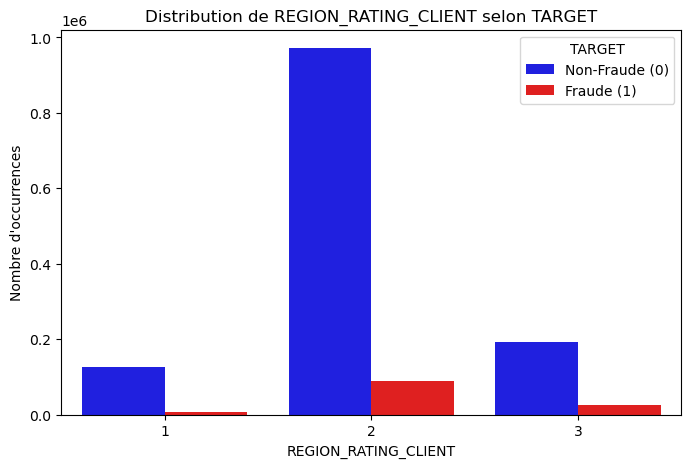

In [105]:
plt.figure(figsize=(8, 5))

# Tracer la distribution de REGION_RATING_CLIENT_W_CITY en fonction de TARGET
sns.countplot(x=df['REGION_RATING_CLIENT'], hue=df['TARGET'], palette=['blue', 'red'])

# Ajouter des labels et un titre
plt.xlabel("REGION_RATING_CLIENT")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de REGION_RATING_CLIENT selon TARGET")
plt.legend(title="TARGET", labels=["Non-Fraude (0)", "Fraude (1)"])

# Afficher le graphique
plt.show()

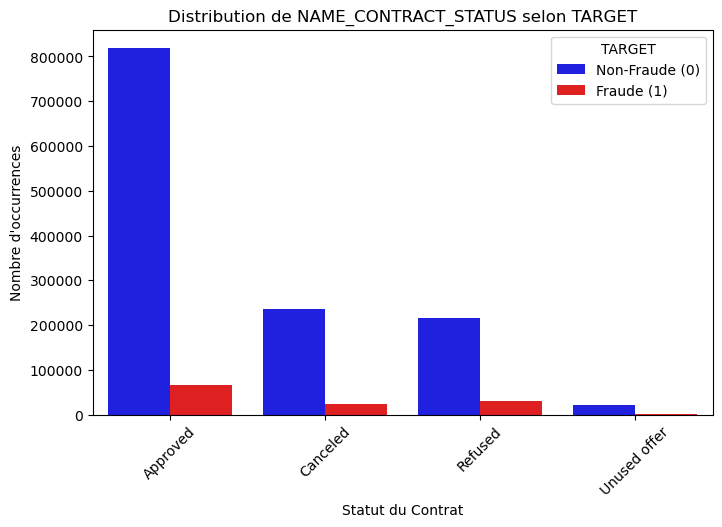

In [106]:
plt.figure(figsize=(8, 5))

# Countplot pour comparer les effectifs des différentes modalités
sns.countplot(x=df['NAME_CONTRACT_STATUS'], hue=df['TARGET'], palette=['blue', 'red'])

# Ajouter des labels et un titre
plt.xlabel("Statut du Contrat")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de NAME_CONTRACT_STATUS selon TARGET")
plt.legend(title="TARGET", labels=["Non-Fraude (0)", "Fraude (1)"])

plt.xticks(rotation=45)  # Rotation pour une meilleure lisibilité

plt.show()

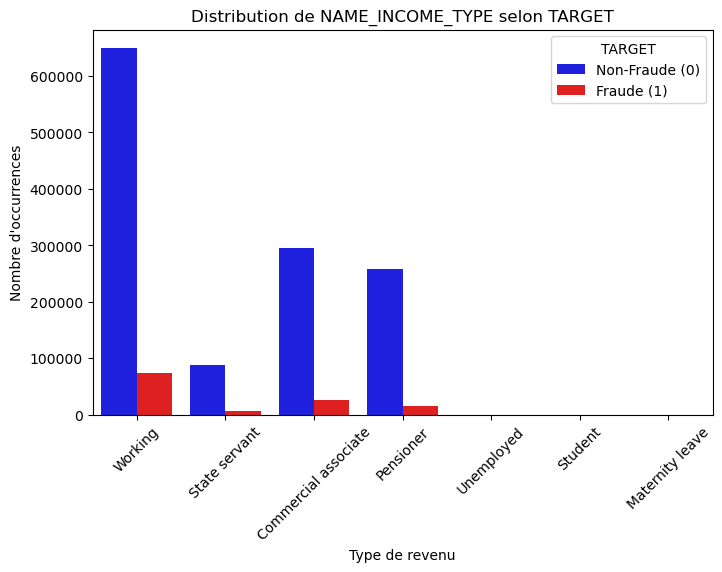

In [107]:
plt.figure(figsize=(8, 5))

# Countplot pour comparer les effectifs des différentes modalités
sns.countplot(x=df['NAME_INCOME_TYPE'], hue=df['TARGET'], palette=['blue', 'red'])

# Ajouter des labels et un titre
plt.xlabel("Type de revenu")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de NAME_INCOME_TYPE selon TARGET")
plt.legend(title="TARGET", labels=["Non-Fraude (0)", "Fraude (1)"])

plt.xticks(rotation=45)  # Rotation pour une meilleure lisibilité

plt.show()

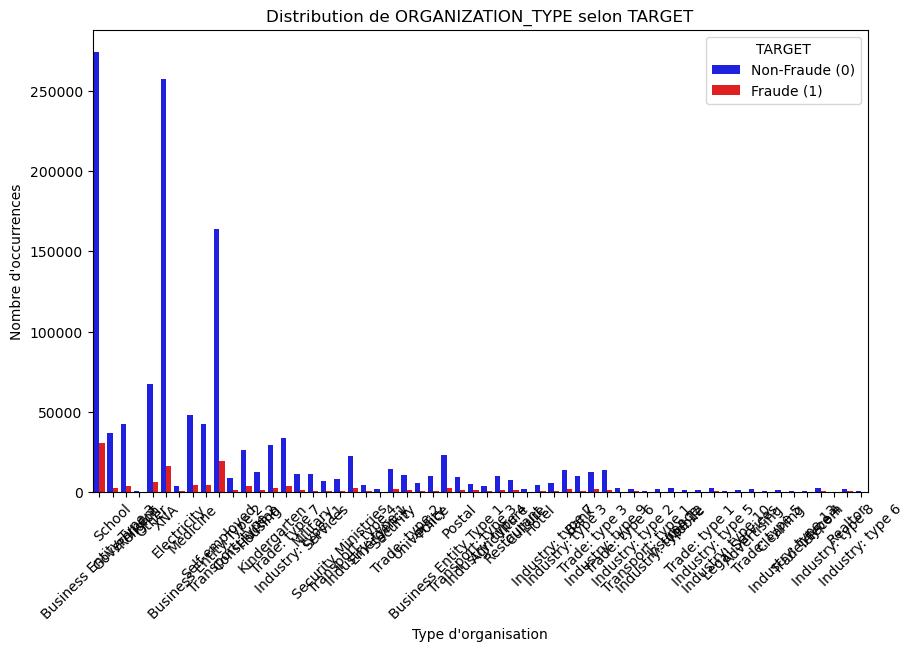

In [108]:
plt.figure(figsize=(10, 6))

# Countplot pour comparer les effectifs des différentes modalités
sns.countplot(x=df['ORGANIZATION_TYPE'], hue=df['TARGET'], palette=['blue', 'red'])

# Ajouter des labels et un titre
plt.xlabel("Type d'organisation")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de ORGANIZATION_TYPE selon TARGET")
plt.legend(title="TARGET", labels=["Non-Fraude (0)", "Fraude (1)"])

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45)

plt.show()

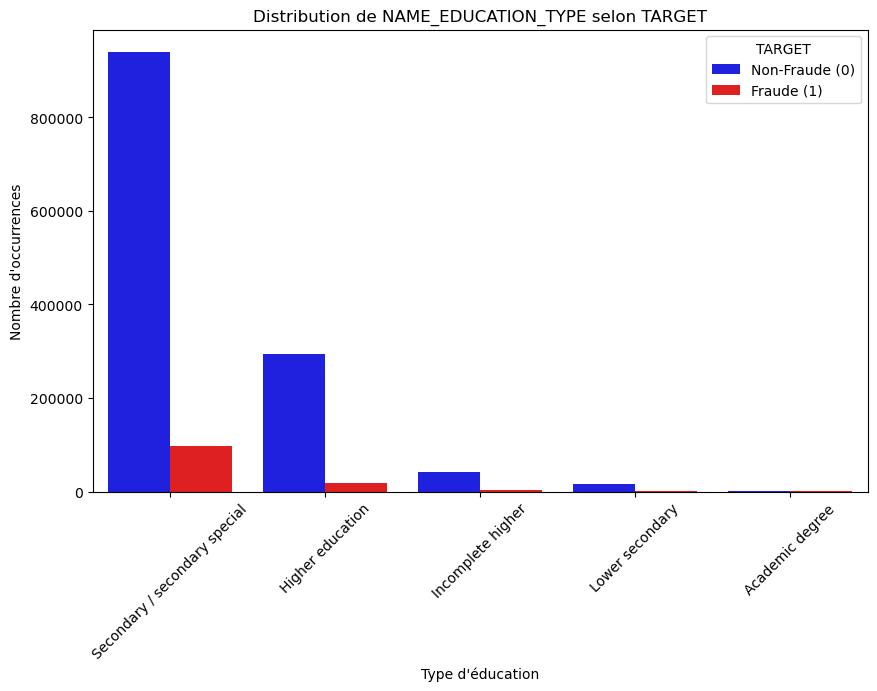

In [109]:
plt.figure(figsize=(10, 6))

# Countplot pour comparer les effectifs des différentes modalités d'éducation
sns.countplot(x=df['NAME_EDUCATION_TYPE'], hue=df['TARGET'], palette=['blue', 'red'])

# Ajouter des labels et un titre
plt.xlabel("Type d'éducation")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de NAME_EDUCATION_TYPE selon TARGET")
plt.legend(title="TARGET", labels=["Non-Fraude (0)", "Fraude (1)"])

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45)

plt.show()

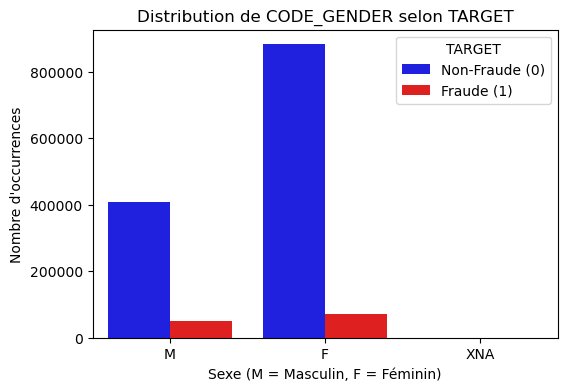

In [110]:
plt.figure(figsize=(6, 4))

# Countplot pour comparer les effectifs des différentes modalités de sexe
sns.countplot(x=df['CODE_GENDER'], hue=df['TARGET'], palette=['blue', 'red'])

# Ajouter des labels et un titre
plt.xlabel("Sexe (M = Masculin, F = Féminin)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution de CODE_GENDER selon TARGET")
plt.legend(title="TARGET", labels=["Non-Fraude (0)", "Fraude (1)"])

plt.show()

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 13 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   DAYS_BIRTH                   1413701 non-null  int64  
 3   REGION_RATING_CLIENT_W_CITY  1413701 non-null  int64  
 4   REGION_RATING_CLIENT         1413701 non-null  int64  
 5   DAYS_ID_PUBLISH              1413701 non-null  int64  
 6   NAME_CONTRACT_STATUS         1413701 non-null  object 
 7   NAME_INCOME_TYPE             1413701 non-null  object 
 8   ORGANIZATION_TYPE            1413701 non-null  object 
 9   NAME_EDUCATION_TYPE          1413701 non-null  object 
 10  CODE_GENDER                  1413701 non-null  object 
 11  AGE                          1413701 non-null  float64
 12  PUBLISH_DATE                 1413701 non-n

In [112]:
categorical_features = ['NAME_CONTRACT_STATUS', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded.head()

,SK_ID_CURR,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,AGE,PUBLISH_DATE,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,...,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,100002,1,-9461,2,2,-2120,25.9,2019-05-13,False,False,...,False,False,False,False,False,False,False,False,False,True
1,100003,0,-16765,1,1,-291,45.9,2024-05-15,False,False,...,False,False,False,False,False,False,True,False,False,False
2,100003,0,-16765,1,1,-291,45.9,2024-05-15,False,False,...,False,False,False,False,False,False,True,False,False,False
3,100003,0,-16765,1,1,-291,45.9,2024-05-15,False,False,...,False,False,False,False,False,False,True,False,False,False
4,100004,0,-19046,2,2,-2531,52.2,2018-03-28,False,False,...,False,False,False,False,False,False,False,False,False,True


Training et Testing

In [113]:
X = df_encoded.drop(['TARGET', 'SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'PUBLISH_DATE'],  axis=1)
y = df_encoded['TARGET']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1130960, 75) (282741, 75) (1130960,) (282741,)


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Précision du modèle : 0.9138
Matrice de confusion :
 [[258362      0]
 [ 24379      0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    258362
           1       0.00      0.00      0.00     24379

    accuracy                           0.91    282741
   macro avg       0.46      0.50      0.48    282741
weighted avg       0.83      0.91      0.87    282741



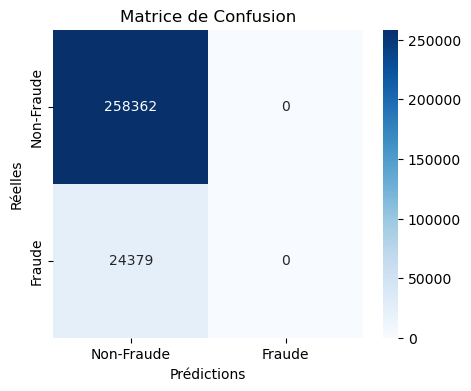

In [116]:
# Regression logistique 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression()  
model.fit(X_train, y_train)  

y_pred = model.predict(X_test) 

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.4f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Rapport de classification (précision, rappel, f1-score)
print("Rapport de classification :\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraude", "Fraude"], yticklabels=["Non-Fraude", "Fraude"])
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Matrice de Confusion")
plt.show()

Précision du modèle XGBoost : 0.9139
Matrice de confusion :
 [[258360      2]
 [ 24336     43]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      1.00      0.96    258362
           1       0.96      0.00      0.00     24379

    accuracy                           0.91    282741
   macro avg       0.93      0.50      0.48    282741
weighted avg       0.92      0.91      0.87    282741



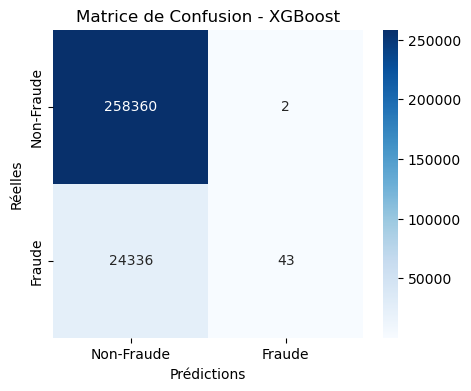

In [117]:
!pip install xgboost
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle XGBoost : {accuracy:.4f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Rapport de classification (précision, rappel, f1-score)
print("Rapport de classification :\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraude", "Fraude"], yticklabels=["Non-Fraude", "Fraude"])
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Matrice de Confusion - XGBoost")
plt.show()